# 图像运动模糊

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from scipy.ndimage.filters import convolve
from skimage.util import view_as_windows as viewW

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/car.jpg'),cv2.COLOR_BGR2RGB)

In [17]:
def motion_blur(src,k,direction = 1):
    dst = np.zeros(src.shape,dtype=np.float64)
    rows,cols = src.shape[0],src.shape[1]
    for y in range(rows):
        for x in range(cols):
            b = 0
            g = 0
            r = 0
            
            if direction == 1:
                if x >= k:
                    for i in range(k):
                        r += src[y,x - i,0]
                        g += src[y,x - i,1]
                        b += src[y,x - i,2]
                    dst[y,x,0] = r / (k + 1)
                    dst[y,x,1] = g / (k + 1)
                    dst[y,x,2] = b / (k + 1)
                else:
                    if x > 0:
                        for i in range(x):
                            r += src[y,x - i,0]
                            g += src[y,x - i,1]
                            b += src[y,x - i,2]
                        
                        dst[y,x,0] = r / (x + 1)
                        dst[y,x,1] = g / (x + 1)
                        dst[y,x,2] = b / (x + 1)
                    else:
                        dst[y,x] = src[y,x] / k
            elif direction == 2:
                if y >= k:
                    for i in range(k):
                        r += src[y-i,x,0]
                        g += src[y-i,x,1]
                        b += src[y-i,x,2]
                    dst[y,x,0] = r / (k + 1)
                    dst[y,x,1] = g / (k + 1)
                    dst[y,x,2] = b / (k + 1)
                else:
                    if y > 0:
                        for i in range(y):
                            r += src[y-i,x ,0]
                            g += src[y-i,x ,1]
                            b += src[y-i,x ,2]
                        
                        dst[y,x,0] = r / (y + 1)
                        dst[y,x,1] = g / (y + 1)
                        dst[y,x,2] = b / (y + 1)
                    else:
                        dst[y,x] = src[y,x] / k
                        
                
    return cv2.convertScaleAbs(dst)

In [13]:
dst = motion_blur(src,k=50)

Text(0.5,1,'Motion Blur:X Direction')

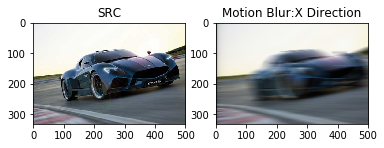

In [14]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Motion Blur:X Direction')

In [18]:
dst = motion_blur(src,k=50,direction=2)

Text(0.5,1,'Motion Blur:Y Direction')

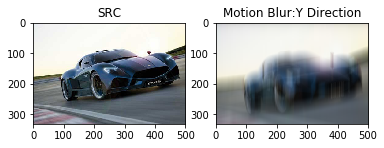

In [19]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Motion Blur:Y Direction')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45095983